In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()

In [93]:
df_train = pd.read_csv('titanic/train(1).csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [154]:
def clean_data(df):
    
    # Get the unique values of Sex
    sexes = np.sort(df['Sex'].unique())
    

     # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    
     
    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
   
    
     # Get the unique values of Embarked
    embarked_locs = np.sort(df['Embarked'].unique())
   
    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
   
      
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    
    ## Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val' : 
                       { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                       }
                   }, 
                   inplace=True)
        
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
        
        
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']    
    
    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'].groupby([df['Sex_Val'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))
    
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df
df_train = clean_data(df_train)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_Val,Embarked_Val_C,Embarked_Val_Q,Embarked_Val_S,AgeFill,FamilySize,Embarked_Val_C,Embarked_Val_Q,Embarked_Val_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0.0,0.0,1.0,22.0,1,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,1.0,0.0,0.0,38.0,1,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0.0,0.0,1.0,26.0,0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0.0,0.0,1.0,35.0,1,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,0.0,0.0,1.0,35.0,0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,1,0.0,1.0,0.0,25.0,0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,0.0,0.0,1.0,54.0,0,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1,0.0,0.0,1.0,2.0,4,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,0.0,0.0,1.0,27.0,2,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,0,1.0,0.0,0.0,14.0,1,1.0,0.0,0.0


0    549
1    342
Name: Survived, dtype: int64


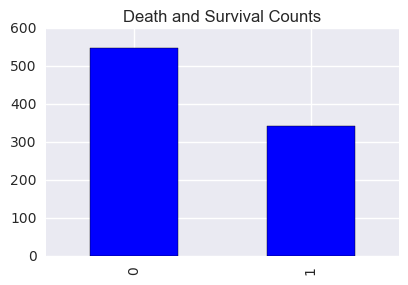

In [79]:


# Size of matplotlib figures that contain subplots
figsize_with_subplots = (10, 10)

# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts',
                                         color='b',
                                         align='center')
print df_train['Survived'].value_counts()

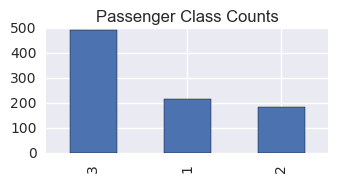

In [83]:
# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

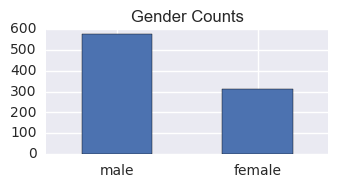

In [86]:
# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)


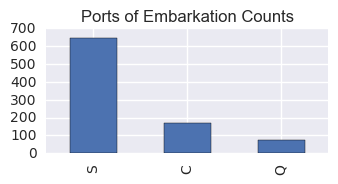

In [87]:
# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

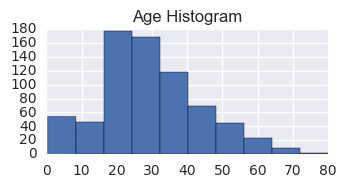

In [98]:
# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')


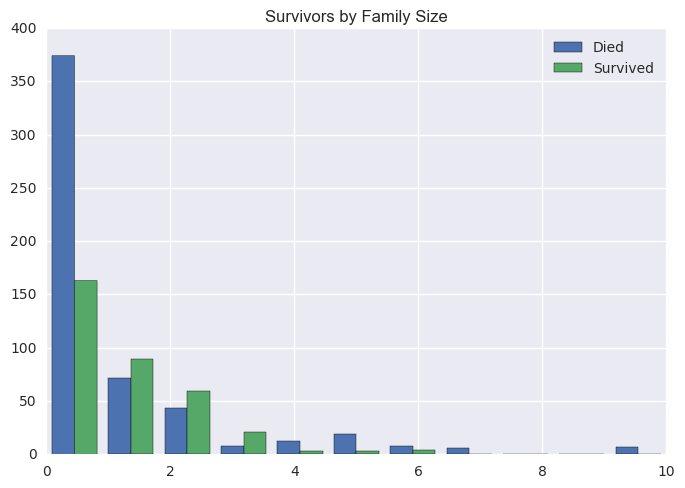

In [121]:


# Get the unique values of Embarked and its maximum
family_sizes = (df_train.FamilySize)
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked= False)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

In [126]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


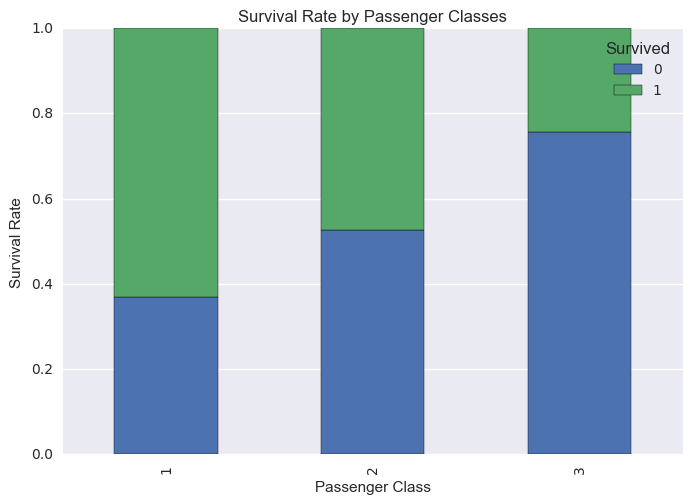

In [127]:
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

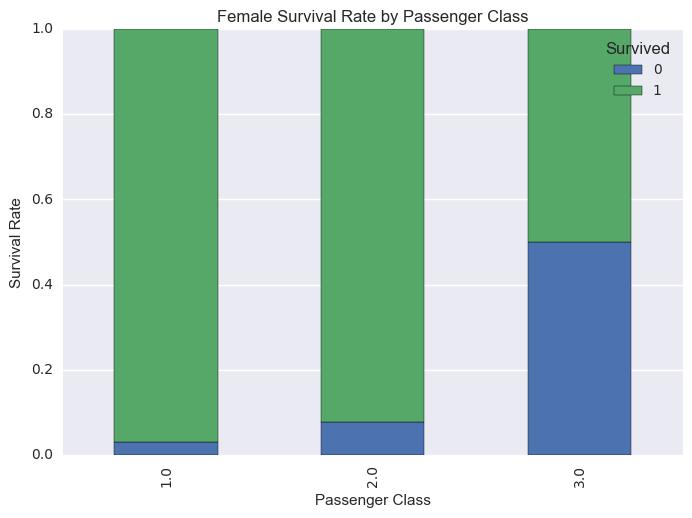

In [128]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

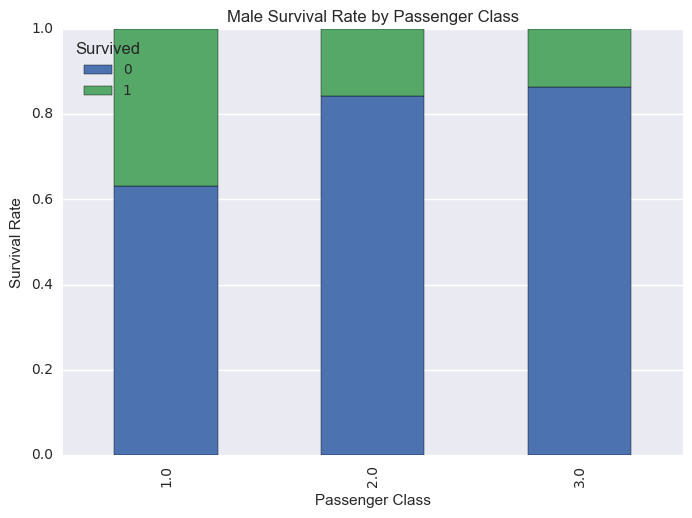

In [130]:
 #Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

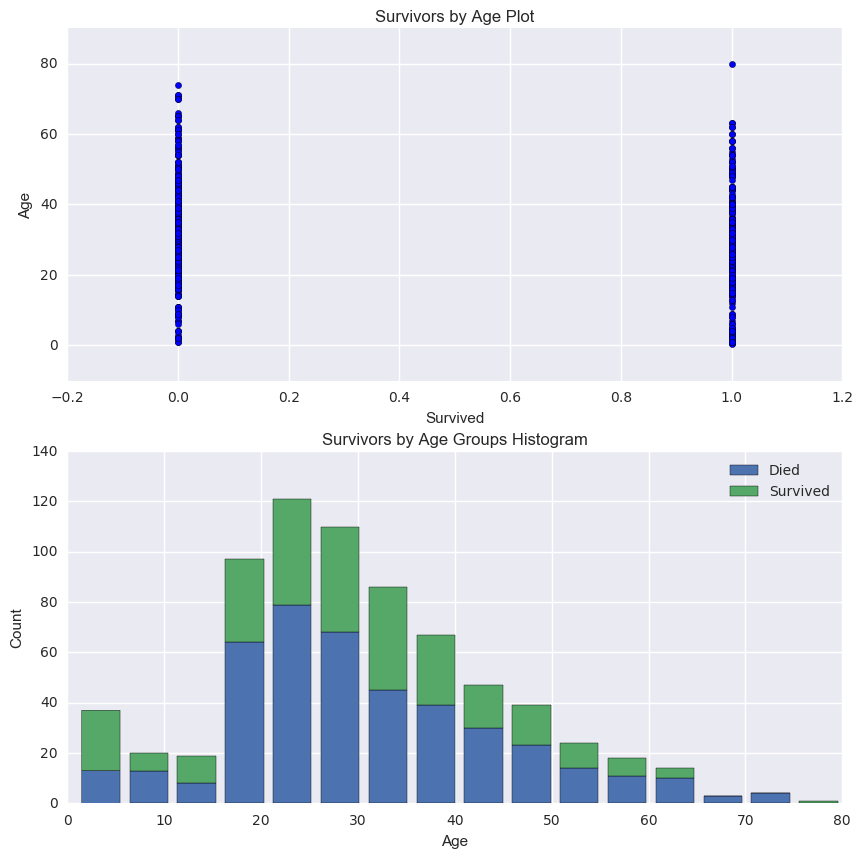

In [143]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=figsize_with_subplots)


# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])

axes[1].hist([df1, df2], 
             bins=max_age/5, 
             range=(1, max_age), 
             stacked=True)
axes[1].legend(('Died', 'Survived'), loc='best')
axes[1].set_title('Survivors by Age Groups Histogram')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[0].scatter(df_train['Survived'], df_train['AgeFill'])
axes[0].set_title('Survivors by Age Plot')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Age')

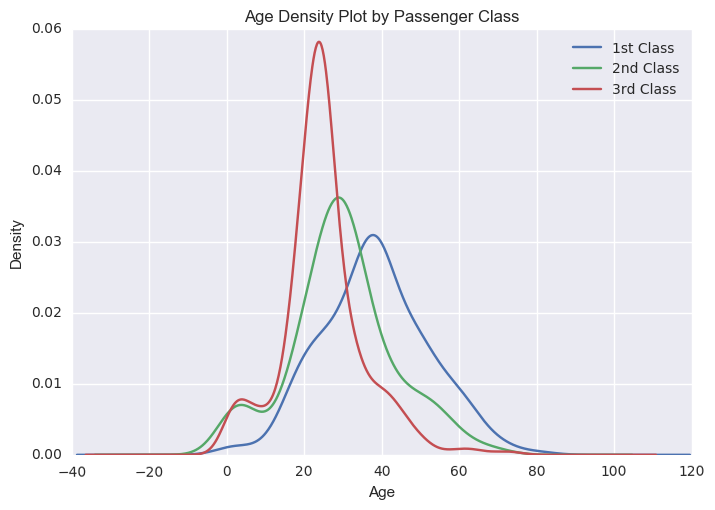

In [153]:
# Get the unique values of Pclass:
passenger_classes = np.sort(df_train['Pclass'].unique())

for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [157]:
df_train['FareRound'] = df_train['Fare'].round()

512.0


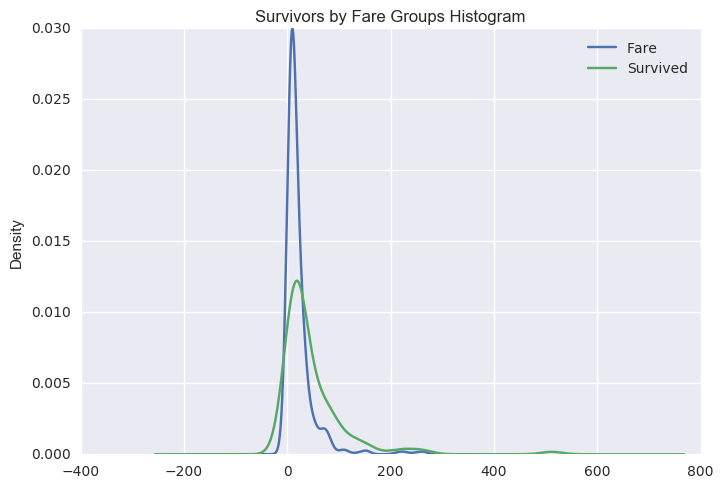

In [171]:
df1 = df_train[df_train['Survived'] == 0]['FareRound']
df2 = df_train[df_train['Survived'] == 1]['FareRound']
max_fare = max(df_train['FareRound'])
print max_fare

df_train['FareRound'][df_train['Survived'] == 0].plot(kind='kde')
df_train['FareRound'][df_train['Survived'] == 1].plot(kind='kde')

plt.legend(('Fare', 'Survived'), loc='best')
plt.title('Survivors by Fare Groups Histogram')

